<a href="https://colab.research.google.com/github/csabi0312/crypto-svm/blob/main/crypto14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install ujson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install oandapyV20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install v20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade git+https://github.com/yhilpisch/tpqoa.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/yhilpisch/tpqoa.git to /tmp/pip-req-build-ieadu5bs
  Running command git clone --filter=blob:none --quiet https://github.com/yhilpisch/tpqoa.git /tmp/pip-req-build-ieadu5bs
  Resolved https://github.com/yhilpisch/tpqoa.git to commit f47a1ffddd2b2684c7e1569df6210b98dbe4e701
  Preparing metadata (setup.py) ... done


In [ ]:
import pickle
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz
import pickle
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import keras.losses
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras_tuner
import tpqoa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
import oandapyV20.endpoints.instruments as instruments
import datetime
import oandapyV20.endpoints.instruments as instruments
import datetime
from sklearn.metrics import mean_squared_error as mse

In [ ]:
pip install rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rich.progress import track

# DATA

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Crypto/new2/crypto_full.csv",index_col=0)
felso=np.quantile(data["PCT_price"],0.5)
also=np.quantile(data["PCT_price"],0.5)
returns2=(data["PCT_price"]>=0).astype(int)-(data["PCT_price"]<0).astype(int)
#returns2=(data["PCT_price"]>0).astype(int)
data["returns2"]=returns2
#
cols = []
for lag in range(1, 6):
    col = "lag{}".format(lag)
    data[col] = data.PCT_price.shift(lag)
    cols.append(col)
    data.dropna(inplace = True)
data.drop(["Adj close"],axis=1,inplace=True)
data.dropna(inplace=True)
leng=int(len(data)*0.7)
X_train=data.drop(["PCT_price","returns2"],axis=1).iloc[:leng].to_numpy()
y_train=data["returns2"].iloc[:leng].to_numpy().astype(int)

X_test=data.drop(["PCT_price","returns2"],axis=1).iloc[leng:].to_numpy()
y_test=data["returns2"].iloc[leng:].to_numpy().astype(int)

#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train, 3)
#y_test = to_categorical(y_test, 3)

scaler1=MinMaxScaler()
X_train=scaler1.fit_transform(X_train)
X_test=scaler1.transform(X_test)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1404, 53) (1404,) (603, 53) (603,)


In [ ]:
data_cor=data.drop(["Spread","PCT_price"],axis=1)
plt.figure(figsize=(20, 20), 
           dpi = 1000)
dataplot = sns.heatmap(data_cor.corr(), cmap=sns.diverging_palette(20, 220, n=256), annot=False)
dataplot

In [ ]:
korr=data_cor.corr()
type(korr)

pandas.core.frame.DataFrame

In [ ]:
np.sort(np.abs(korr["returns2"]))[-2]

0.08650800983250413

# SVM

In [ ]:
param_grid = {'C': np.arange(0.02,0.2,0.02), 'gamma': np.arange(0.002,0.02,0.002),'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_train)
print(grid.best_params_)
print(confusion_matrix(y_train,grid_predictions))
print(classification_report(y_train,grid_predictions))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END ....................C=0.02, gamma=0.002, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.02, gamma=0.002, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.02, gamma=0.002, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.02, gamma=0.002, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.02, gamma=0.002, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.02, gamma=0.004, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.02, gamma=0.004, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.02, gamma=0.004, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.02, gamma=0.004, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.02, gamma=0.004, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.02, gamma=0.006, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.02, gamma=0.00

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#lf = LogisticRegression(C=1e5,max_iter=100000,multi_class="ovr",class_weight="balanced").fit(X_train, y_train)
param_grid = {'C': [1e5,1e6, 1e4], 'multi_class': ['ovr','ovo'],'class_weight': ['balanced',None],'max_iter':[100000]}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(grid.best_params_)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END C=100000.0, class_weight=balanced, max_iter=100000, multi_class=ovr; total time=   1.5s
[CV] END C=100000.0, class_weight=balanced, max_iter=100000, multi_class=ovr; total time=   1.1s
[CV] END C=100000.0, class_weight=balanced, max_iter=100000, multi_class=ovr; total time=   2.0s
[CV] END C=100000.0, class_weight=balanced, max_iter=100000, multi_class=ovr; total time=   1.3s
[CV] END C=100000.0, class_weight=balanced, max_iter=100000, multi_class=ovr; total time=   1.0s
[CV] END C=100000.0, class_weight=balanced, max_iter=100000, multi_class=ovo; total time=   0.0s
[CV] END C=100000.0, class_weight=balanced, max_iter=100000, multi_class=ovo; total time=   0.0s
[CV] END C=100000.0, class_weight=balanced, max_iter=100000, multi_class=ovo; total time=   0.0s
[CV] END C=100000.0, class_weight=balanced, max_iter=100000, multi_class=ovo; total time=   0.0s
[CV] END C=100000.0, class_weight=balanced, max_iter=100000, multi

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1519, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 478, in _check_multi_class
    raise ValueErro

{'C': 100000.0, 'class_weight': None, 'max_iter': 100000, 'multi_class': 'ovr'}
[[249  54]
 [239  57]]
              precision    recall  f1-score   support

          -1       0.51      0.82      0.63       303
           1       0.51      0.19      0.28       296

    accuracy                           0.51       599
   macro avg       0.51      0.51      0.45       599
weighted avg       0.51      0.51      0.46       599



In [ ]:
print(grid.best_params_)

{'C': 100000.0, 'class_weight': None, 'max_iter': 100000, 'multi_class': 'ovr'}


# RandomForest

[[ 71 170]
 [ 72 145]]
              precision    recall  f1-score   support

          -1       0.50      0.29      0.37       241
           1       0.46      0.67      0.55       217

    accuracy                           0.47       458
   macro avg       0.48      0.48      0.46       458
weighted avg       0.48      0.47      0.45       458

[0.0090397  0.00848876 0.00990457 0.01098148 0.01328392 0.00287926
 0.00842624 0.00847994 0.00920825 0.00857147 0.00976281 0.00796629
 0.00999455 0.01062684 0.01347545 0.01080912 0.01275587 0.01250524
 0.01189286 0.01230279 0.01231565 0.00914276 0.01447953 0.0102292
 0.01276356 0.01280186 0.01078752 0.0150004  0.01084831 0.01114764
 0.0116243  0.01196862 0.01106889 0.00996531 0.01539427 0.01092702
 0.00965145 0.00889382 0.01081524 0.01332103 0.01243387 0.01205851
 0.01230404 0.01195953 0.0110694  0.00787391 0.01045029 0.009076
 0.01650317 0.01456106 0.01545746 0.01497416 0.01503239 0.01728427
 0.01551252 0.01695555 0.01514225 0.01744301 0.018

<BarContainer object of 79 artists>

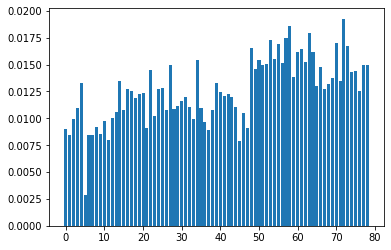

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
grid_predictions = clf.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print(clf.feature_importances_)
plt.bar(np.arange(0,X_train.shape[1]),clf.feature_importances_)

# Combining the 3

In [ ]:
svm=SVC(C=1,gamma=0.01,kernel="rbf").fit(X_train,y_train)
log_reg=SVC(C=1,gamma=0.01,kernel="linear").fit(X_train,y_train)
log_reg2=SVC(C=1,gamma=0.01,kernel="poly").fit(X_train,y_train)
log_reg3=SVC(C=1,gamma=0.01,kernel='sigmoid').fit(X_train,y_train)
#log_reg=LogisticRegression(C=100000,max_iter=100000,multi_class='ovr').fit(X_train,y_train)
rand_forest=RandomForestClassifier().fit(X_train,y_train)

s_pred=svm.predict(X_train)
l_pred=log_reg.predict(X_train)
l_pred2=log_reg2.predict(X_train)
l_pred3=log_reg3.predict(X_train)
r_pred=rand_forest.predict(X_train)

X_train2=np.vstack([s_pred,l_pred,l_pred2,l_pred3,r_pred]).T

from tensorflow.keras.utils import to_categorical
y_train2 = to_categorical(y_train, 3)
y_test2 = to_categorical(y_test, 3)

print(X_train.shape,X_train2.shape)

(1205, 72) (1205, 5)


In [ ]:
def build_model(hp):
  hp_units = hp.Int('units', min_value=1, max_value=20, step=1)
  model = Sequential()
  model.add(Dense(hp_units,input_shape=(5,)))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

tuner = keras_tuner.RandomSearch(
      build_model,
      objective='val_loss',
      max_trials=20,overwrite = True)
tuner.search(X_train2,y_train2 , epochs=10, validation_split=0.1)
best_model = tuner.get_best_models()[0]
best_model.summary()

Trial 14 Complete [00h 00m 03s]
val_loss: 0.40915775299072266

Best val_loss So Far: 0.39862266182899475
Total elapsed time: 00h 00m 40s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                114       
                                                                 
 dense_1 (Dense)             (None, 3)                 60        
                                                                 
Total params: 174
Trainable params: 174
Non-trainable params: 0
_________________________________________________________________


In [ ]:
grid_predictions=np.argmax(best_model.predict(np.vstack([svm.predict(X_test),log_reg.predict(X_test),log_reg2.predict(X_test),log_reg3.predict(X_test),rand_forest.predict(X_test)]).T),1)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

17/17 [==============================] - 0s 2ms/step
[[  0  13  21]
 [  0 105 118]
 [  0 114 146]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.45      0.47      0.46       223
           2       0.51      0.56      0.54       260

    accuracy                           0.49       517
   macro avg       0.32      0.34      0.33       517
weighted avg       0.45      0.49      0.47       517



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
